# Imports

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Retrieve and Preprocess the Data

In [27]:
# Read input data from csv file

df = pd.read_csv('input.csv')

In [28]:
# Function to standardize a data vector

def standardize(data: np.array) -> np.array:
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [30]:
# Collect relevant features and convert to numpy array

data = df[['Outstate', 'F.Undergrad', 'Grad.Rate']]
data = data.to_numpy()

label_data = df[['Private']]
label_data = label_data.to_numpy()

data_std = standardize(data)

# Implement K Means Clustering

In [31]:
# Function to determine whether the centriods have converged to thier final location

def is_terminated(oldCentroids: np.array, newCentroids: np.array) -> bool:
    if np.linalg.norm(newCentroids - oldCentroids) < 0.001:
        return True
    return False

In [32]:
# Helper function to compute the distance between a given data point and centroid

def dist(data_sample, centroid_sample):
    dist_sum = 0
    for i in range(data_sample.shape[0]):
        dist_sum += (data_sample[i] - centroid_sample[i]) ** 2
    return np.sqrt(dist_sum)

In [33]:
# Function to label each data point given the centroids

def get_labels(data, centroids) -> np.array:
    labels = np.empty(data.shape[0])
    distances = np.full(data.shape[0], float('inf'))

    for i in range(data.shape[0]):
        for c in range(centroids.shape[0]):
            d = dist(data[i], centroids[c])
            if d < distances[i]:
                distances[i] = d
                labels[i] = c

    return labels

In [35]:
# Function to calculate new centriod location using arithmetic mean

def get_centroids(data, labels, k):
    centroids = np.zeros((k, data.shape[1]))

    for c in range(0, k):
        centroid_sum = np.zeros(centroids.shape[1])
        centroid_cnt = 0
        for i in range(labels.shape[0]):
            if labels[i] == c:
                centroid_cnt += 1
                centroid_sum += data[i]
        if centroid_cnt == 0:
            centroids[c] = data[np.random.randint(0, data.shape[0] - 1)]
        else:
            centroids[c] = centroid_sum / centroid_cnt

    return centroids

In [36]:
# Main function to implement k mean clustering algorithm

def k_means(data, k):

    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    oldCentroids = np.zeros((centroids.shape[0], data.shape[1]))

    inter = 0
    while not is_terminated(oldCentroids, centroids) and inter < 1000:
        inter += 1
        oldCentroids = centroids
        labels = get_labels(data, centroids)

        centroids = get_centroids(data, labels, k)
        
    labels = get_labels(data, centroids)

    return centroids, labels

In [37]:
# Function to find the average centroid through multiple interations of k means clustering

def avg_k_means(data, k, num_iter = 10):

    centroids = np.empty((k, data.shape[1]))

    for i in range(num_iter):
        centroid, label = k_means(data, 2)
        centroids += centroid
    centroids = centroids / num_iter

    labels = get_labels(data, centroids)

    return centroids, labels

# Evaluate the Model

In [38]:
# Function to calculate the actual centroids using the true labels

def find_actual_centroids(data):

    public_cnt = df['Private'].value_counts()['No']
    private_cnt = df['Private'].value_counts()['Yes']

    public_sum = np.zeros(data.shape[1])
    private_sum = np.zeros(data.shape[1])

    for i in range(data.shape[0]):
        if label_data[i] == "Yes":
            private_sum += data[i]
        else:
            public_sum += data[i]

    public_centroid = public_sum / public_cnt
    private_centroid = private_sum / private_cnt

    return public_centroid, private_centroid

In [39]:
# Calculate the percent accuracy of the model using the real and calculated labels

def k_means_accuracy(labels):

    cnt = 0
    for i in range(data.shape[0]):
        if label_data[i] == "Yes" and labels[i] == l:
            cnt += 1
        if label_data[i] == "No" and not labels[i] == l:
            cnt += 1

    return cnt/data.shape[0]

# Cluster Original College Data

In [40]:
# Train model on original data

centroids_org, labels_org = avg_k_means(data, 2)
centroids_real_org = find_actual_centroids(data)

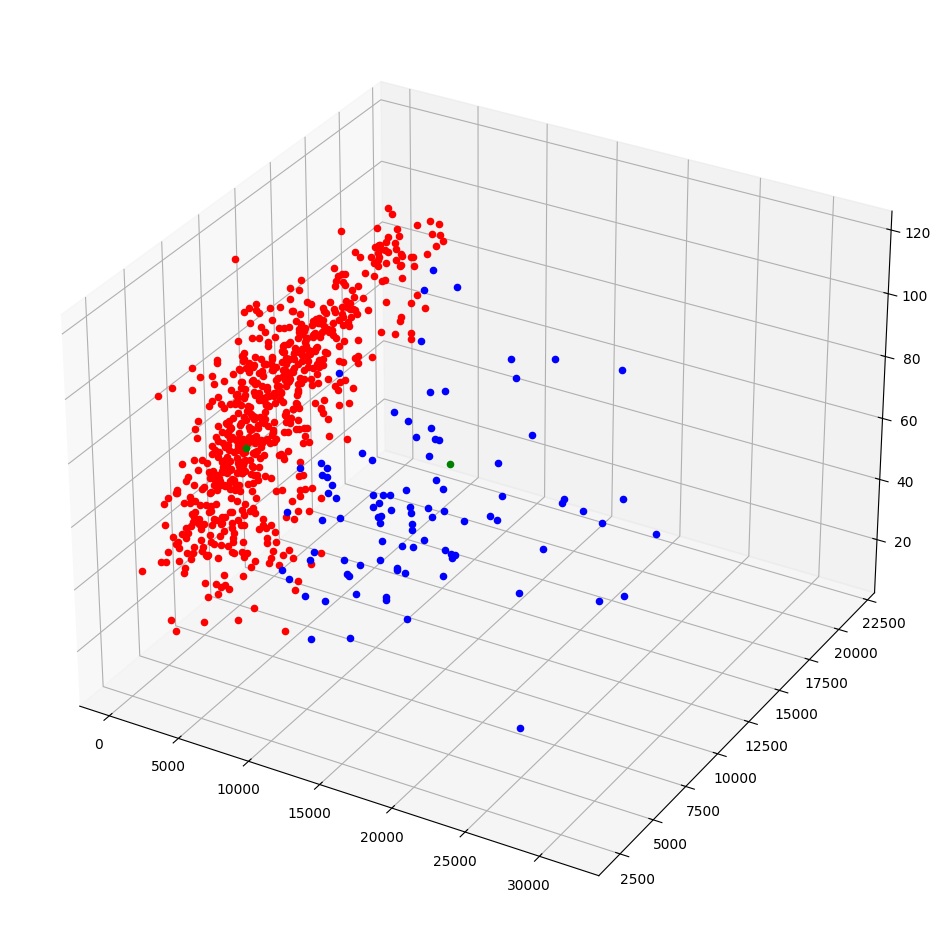

In [41]:
# Plot original data with calculated clustering and centroids

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for i in range(data.shape[0]):
    if labels_org[i] == 1:
        ax.scatter(data[i][1], data[i][0], data[i][2], c='red')
    else:
        ax.scatter(data[i][1], data[i][0], data[i][2], c='blue')


for i in range(centroids_org.shape[0]):
   ax.scatter(centroids_org[i][1], centroids_org[i][0], centroids_org[i][2], color='green')

plt.xlabel('F. Undergrad')
plt.ylabel('Outstate')
ax.set_zlabel('Grad. Rate')

plt.show()

In [42]:
print("K Means Clustering Accuracy on the Original Data Set: ", k_means_accuracy(labels_org))

0.8172458172458172


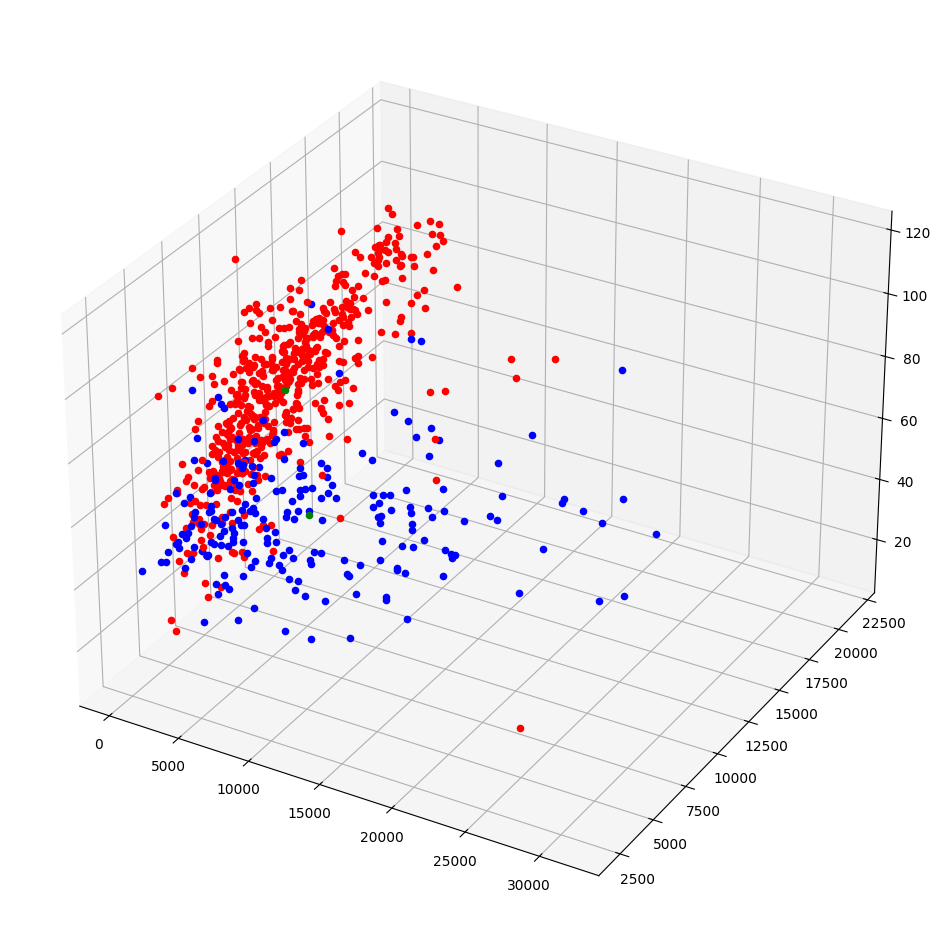

In [43]:
print("Calculated Centroids: ", *centroids_org)

In [ ]:
# Plot original data with real clustering and centroids

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for i in range(data.shape[0]):
    if label_data[i] == "Yes":
        ax.scatter(data[i][1], data[i][0], data[i][2], c='red')
    else:
        ax.scatter(data[i][1], data[i][0], data[i][2], c='blue')

for centroid in centroids_real_org:
    ax.scatter(centroid[1], centroid[0], centroid[2], color='green')

plt.xlabel('F. Undergrad')
plt.ylabel('Outstate')
ax.set_zlabel('Grad. Rate')

plt.show()

In [ ]:
print("Real Centroids: ", *centroids_real_org)

# Cluster Standardized College Data

In [ ]:
# Train model on standardized data

centroids_std, labels_std = avg_k_means(data_std, 2)
centroids_real_std = find_actual_centroids(data_std)

In [ ]:
# Plot standardized data with calculated clustering and centroids

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for i in range(data_std.shape[0]):
    if labels_std[i] == 1:
        ax.scatter(data_std[i][1], data_std[i][0], data_std[i][2], c='red')
    else:
        ax.scatter(data_std[i][1], data_std[i][0], data_std[i][2], c='blue')


for i in range(centroids_std.shape[0]):
   ax.scatter(centroids_std[i][1], centroids_std[i][0], centroids_std[i][2], color='green')

plt.xlabel('F. Undergrad')
plt.ylabel('Outstate')
ax.set_zlabel('Grad. Rate')

plt.show()

In [ ]:
print("K Means Clustering Accuracy on the Standardized Data Set: ", k_means_accuracy(labels_std))

In [ ]:
print("Calculated Centroids: ", *centroids_std)

In [ ]:
# Plot original data with real clustering and centroids

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for i in range(data.shape[0]):
    if label_data[i] == "Yes":
        ax.scatter(data_std[i][1], data_std[i][0], data_std[i][2], c='red')
    else:
        ax.scatter(data_std[i][1], data_std[i][0], data_std[i][2], c='blue')

for centroid in centroids_real_std:
    ax.scatter(centroid[1], centroid[0], centroid[2], color='green')

plt.xlabel('F. Undergrad')
plt.ylabel('Outstate')
ax.set_zlabel('Grad. Rate')

plt.show()

In [ ]:
print("Real Centroids: ", *centroids_real_std)

# Optimizing k Value

In [47]:
# Function to calculate the SSE for a given iteration of k-means clustering

def sum_squared_error(data, k):
    centroids, labels = k_means(data, k)
    error = 0
    for i in range(data.shape[0]):
        centroid = centroids[int(labels[i])]
        error += np.sum(dist(data[i], centroid) ** 2)
    return error

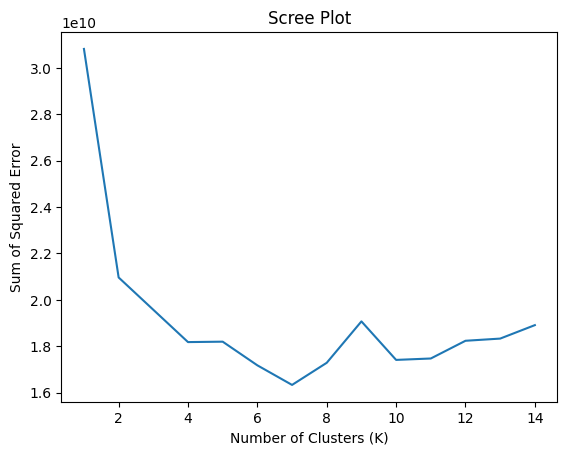

In [48]:
# Plot scree plot of k-values vs. SSE

k_values = range(1, 10)

errors = [sum_squared_error(data, k) for k in k_values]

plt.plot(k_values, errors)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Error')
plt.title('Scree Plot')
plt.show()